# Appendix Spectral Clustering

This notebook should be regarded as an appendix. It was used to create different plots and dataframes which are shown in our explanation of the spectral clustering algorithm.

## Part 1: Affinity and Laplacian Matrix
### Stylized Datapoints for Affinity and Laplacian Matrix

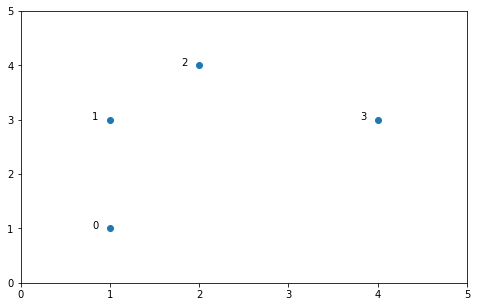

In [219]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import laplacian as csgraph_laplacian
from scipy.sparse.linalg import eigsh
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
# Initialize Data Set
X = np.array([[1, 1], [1, 3], [2, 4], [4, 3]])

# Plot Data Set
plt.figure(figsize=(8,5))
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.text(0.8, 1, '0')
plt.text(0.8, 3, '1')
plt.text(1.8, 4, '2')
plt.text(3.8, 3, '3')
plt.scatter(X[:, 0], X[:, 1])
plt.savefig('dataset1.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

### Affinity Matrix
#### Affinity Matrix using `nearest_neighbors`
Initially, the affinity matrix is displayed, which is outputted by clustering.affinity_matrix_. To gain a better understanding about the calculations, it was in a second step "manually" implemented without using sklearn.cluster.SpectralClustering.

In [220]:
# 1: Using sklearn.cluster.SpectralClustering and clustering.affinity_matrix_
# Perform Clustering
clustering = SpectralClustering(n_clusters=2,
                                affinity='nearest_neighbors',
                                n_neighbors=2,
                                random_state=0).fit(X)

# Show the Affinity Matrix using the implementation of sklearn
index = list(range(0, len(X)))
columns = list(range(0, len(X)))
# Construct DataFrame
df_affinity_kn = pd.DataFrame(clustering.affinity_matrix_.toarray(), index = index, columns = columns)
# Output Affinity Matrix as DataFrame
df_affinity_kn

,0,1,2,3
0,1.0,0.5,0.0,0.0
1,0.5,1.0,1.0,0.0
2,0.0,1.0,1.0,0.5
3,0.0,0.0,0.5,1.0


In [221]:
# 2: Manuell implementation without using sklearn.cluster.SpectralClustering and clustering.affinity_matrix_
# Construct Connectivity Matrix
connectivity = kneighbors_graph(X, n_neighbors=2, include_self=True)
# Construct DataFrame for Connectivity Matrix
df_connectivity = pd.DataFrame(connectivity.toarray(), index = index, columns = columns)
# Output Connectivity Matrix as DataFrame
df_connectivity

,0,1,2,3
0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0


In [33]:
# Construct Affinity Matrix
affinity_matrix_kn = 0.5 * (connectivity + connectivity.T)

# Construct DataFrame
df_affinity_kn_manuell = pd.DataFrame(affinity_matrix_kn.toarray(), index = index, columns = columns)
# Output Affinitx Matrix as DataFrame
df_affinity_kn_manuell

,0,1,2,3
0,1.0,0.5,0.0,0.0
1,0.5,1.0,1.0,0.0
2,0.0,1.0,1.0,0.5
3,0.0,0.0,0.5,1.0


In [36]:
# Check of Calculation
df_affinity_kn == df_affinity_kn_manuell

,0,1,2,3
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True


#### Affinity Matrix using `rbf`
Initially, the affinity matrix is displayed, which is outputted by `clustering.affinity_matrix_`. To gain a better understanding about the calculations, it was in a second step "manually" implemented without using `sklearn.cluster.SpectralClustering`. 

In [37]:
# 1: Using sklearn.cluster.SpectralClustering and clustering.affinity_matrix_
# Perform Clustering
clustering = SpectralClustering(n_clusters=2,
                                affinity = 'rbf',
                                random_state=0).fit(X)

# Construct DataFrame
df_affinity_rbf = pd.DataFrame(clustering.affinity_matrix_, index = index, columns = columns)
# Output Affinity Matrix as DataFrame
df_affinity_rbf

,0,1,2,3
0,1.000000,0.018316,0.000045,0.000002
1,0.018316,1.000000,0.135335,0.000123
2,0.000045,0.135335,1.000000,0.006738
3,0.000002,0.000123,0.006738,1.000000


In [38]:
# 2: Manuell implementation without using sklearn.cluster.SpectralClustering and clustering.affinity_matrix_
# Specific a function to Calculate Euclidean Distance
def euclidean_distance(vector1, vector2):
    distance = math.sqrt(((vector1[0]-vector2[0])**2) + ((vector1[1]-vector2[1])**2))
    return distance

# Calculate the entries for the Affinity Matrix
gamma = 1 # default-value
# Determine Shape of Affinity Matrix
shape = (np.shape(X)[0], np.shape(X)[0])
# Construct Empty Affinity Matrix
affinity_matrix_rbf = np.zeros(shape)
# Update entries of affinity matrix
i = 0
j = 0
for i in range (0, shape[0]):
    for j in range (0, shape[0]):
        # Calculate Distance
        distance = euclidean_distance(X[i], X[j])
        # Calculate Entry for Affinity Matrix
        entry = np.exp(-gamma * distance ** 2)
        # Update Affinity Matrix
        affinity_matrix_rbf[i][j] = entry

# Construct DataFrame
df_affinity_rbf_manuell = pd.DataFrame(affinity_matrix_rbf, index = index, columns = columns)
# Output Affinity Martrix as DataFrame
df_affinity_rbf_manuell

,0,1,2,3
0,1.000000,0.018316,0.000045,0.000002
1,0.018316,1.000000,0.135335,0.000123
2,0.000045,0.135335,1.000000,0.006738
3,0.000002,0.000123,0.006738,1.000000


In [39]:
# Check of Calculation
np.round(df_affinity_rbf, 10) == np.round(df_affinity_rbf_manuell, 10)

,0,1,2,3
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True


### Degree Matrix `rbf`
In the following, the Degree Matrix is calculated by taking the sum of each row in the Affinity Matrix.

In [60]:
# Construct Empty Degree Matrix
degree_matrix_rbf = np.zeros(shape)
# Update entries of Degree matrix
i = 0
for i in range (0, shape[0]):
    sum_row = affinity_matrix_rbf[i, :].sum()
    # Update Degree Matrix
    degree_matrix_rbf[i][i] = sum_row
    
# Transform Degree Matrix into DataFrame
df_degree_rbf = pd.DataFrame(degree_matrix_rbf, index = index, columns = columns)
# Output Degree Matrix as DataFrame
df_degree_rbf

,0,1,2,3
0,1.018363,0.000000,0.000000,0.000000
1,0.000000,1.153774,0.000000,0.000000
2,0.000000,0.000000,1.142119,0.000000
3,0.000000,0.000000,0.000000,1.006864


### Laplacian Matrix `rbf`
In the following, the (unnormalized) Laplacian Matrix is calculated by subtracting the Affinity Matrix from the Degree Matrix. 

In [45]:
# 1: Using sklearn csgraph_laplacian
# Calculate Laplacian Matrix
laplacian, diagonal = csgraph_laplacian(affinity_matrix_rbf, return_diag=True)

# Transform Laplacian Matrix into DataFrame
df_laplacian_rbf = pd.DataFrame(laplacian, index = index, columns = columns)
# Output Laplacian Matrix as DataFrame
df_laplacian_rbf

,0,1,2,3
0,0.018363,-0.018316,-0.000045,-0.000002
1,-0.018316,0.153774,-0.135335,-0.000123
2,-0.000045,-0.135335,0.142119,-0.006738
3,-0.000002,-0.000123,-0.006738,0.006864


In [46]:
# 2: Manuell calculaiton of Laplacian Matrix
laplacian_rbf_manuell = degree_matrix_rbf - affinity_matrix_rbf
# Transform Laplacian Matrix into DataFrame
df_laplacian_rbf_manuell = pd.DataFrame(laplacian_rbf_manuell, index = index, columns = columns)
# Output Laplacian Matrix as DataFrame
df_laplacian_rbf_manuell

,0,1,2,3
0,0.018363,-0.018316,-0.000045,-0.000002
1,-0.018316,0.153774,-0.135335,-0.000123
2,-0.000045,-0.135335,0.142119,-0.006738
3,-0.000002,-0.000123,-0.006738,0.006864


In [48]:
# Check Calculation
round(df_laplacian_rbf_manuell, 10) == round(df_laplacian_rbf, 10)

,0,1,2,3
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True


## Part 2: Eigendecomposition

In [201]:
def plot_eigenvalues (data):
    # Perform Clustering
    clustering = SpectralClustering(n_clusters=2,
                                    affinity = 'rbf',
                                    random_state=0).fit(data)

    # Construct Affinity Matrix
    index = list(range(0, len(data)))
    columns = list(range(0, len(data)))
    affinity_matrix_rbf = clustering.affinity_matrix_
    
    # Construct Degree Matrix
    shape = (np.shape(data)[0], np.shape(data)[0])
    # Construct Empty Degree Matrix
    degree_matrix_rbf = np.zeros(shape)
    # Update entries of Degree matrix
    i = 0
    for i in range (0, shape[0]):
        sum_row = affinity_matrix_rbf[i, :].sum()
        # Update Degree Matrix
        degree_matrix_rbf[i][i] = sum_row
    # Transform Degree Matrix into DataFrame
    df_degree_rbf = pd.DataFrame(degree_matrix_rbf, index = index, columns = columns)
    
    # Construct Laplacian Matrix
    laplacian_rbf_manuell = degree_matrix_rbf - affinity_matrix_rbf
    # Transform Laplacian Matrix into DataFrame
    df_laplacian_rbf_manuell = pd.DataFrame(laplacian_rbf_manuell, index = index, columns = columns)
    
    # Eigendecomposition
    # Determine number of components
    n_components = len(data) 
    # Calculate Eigenvalues and Eigenvectors
    #‘LM’: Largest (in magnitude) eigenvalues
    # Sigma=1.0 also used in spectral_clustering
    eigenvalues_rbf, eigenvectors_rbf = eigsh(laplacian_rbf_manuell, k=n_components, sigma=1.0, which='LM')
    
    # Plotting Eigenvalues
    x_axis = list(range(1, len(eigenvalues_rbf[:6])+1))
    y_axis = eigenvalues_rbf[:6]
    plt.scatter(x_axis, y_axis)
    plt.title('First Six Eigenvalues of Laplacian')

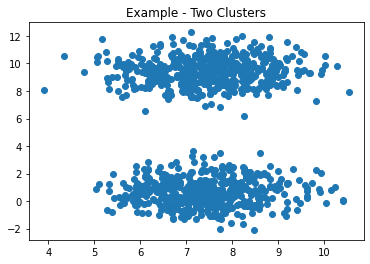

In [222]:
# Dataset 1
# Initialize Dataset
X_1 = datasets.make_blobs(n_samples=1000, random_state=8, centers=2)

# Plotting
plt.scatter(X_1[0][:, 0], X_1[0][:, 1])
plt.title('Example - Two Clusters')
plt.savefig('dataset2_2_clusters.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1590: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


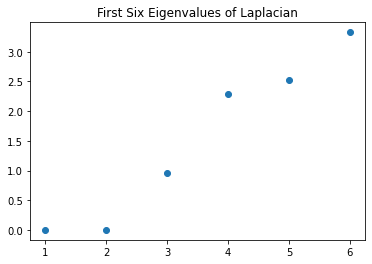

In [223]:
# Plot Eigenvalues
plot_eigenvalues(X_1[0])
plt.savefig('dataset2_eigenvalues.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

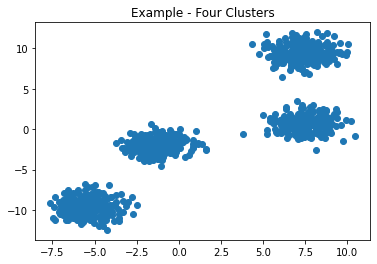

In [224]:
# Dataset 2
# Initialize Dataset
X_2 = datasets.make_blobs(n_samples=1000, random_state=8, centers=4)

# Plotting
plt.scatter(X_2[0][:, 0], X_2[0][:, 1])
plt.title('Example - Four Clusters')
plt.savefig('dataset3_four_clusters.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1590: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


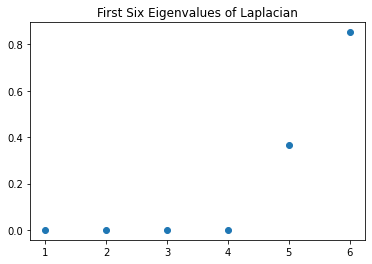

In [225]:
# Plot Eigenvalues
plot_eigenvalues(X_2[0])
plt.savefig('dataset3_eigenvalues.jpg', dpi=300, bbox_inches='tight', pad_inches=0)